In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import pandas as pd

Archivo = pd.read_csv('heart_cleveland_upload.csv')

In [4]:
Archivo.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

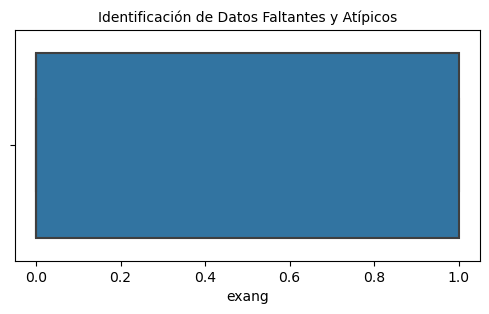

In [5]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['exang'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

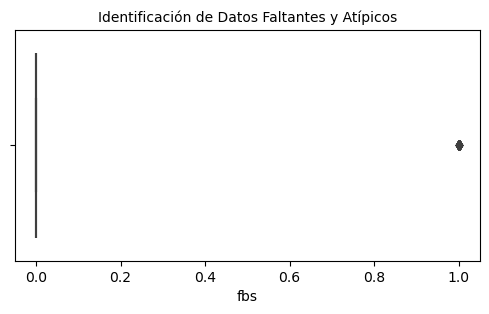

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['fbs'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

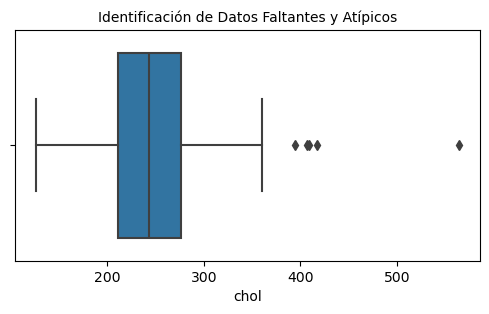

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [8]:
print("Cantidad de Registros con cero  : ",Archivo['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['exang'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['chol'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['slope'].isin([0]).sum())

Cantidad de Registros con cero  :  147
Cantidad de Registros con cero :  200
Cantidad de Registros con cero :  0
Cantidad de Registros con cero :  96
Cantidad de Registros con cero :  139


In [13]:
Archivo ['cp'] = Archivo['restecg'].replace(0, Archivo['cp'].mean())
Archivo['chol']=Archivo['exang'].replace(0,Archivo['chol'].mean())
Archivo['restecg']=Archivo['chol'].replace(0,Archivo['restecg'].mean())
Archivo['thalach']=Archivo['oldpeak'].replace(0,Archivo['thalach'].mean())
Archivo['oldpeak']=Archivo['slope'].replace(0,Archivo['oldpeak'].mean())

In [14]:
print("Cantidad de Registros con cero  : ",Archivo['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['exang'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['chol'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero : ",Archivo['slope'].isin([0]).sum())

Cantidad de Registros con cero  :  0
Cantidad de Registros con cero :  200
Cantidad de Registros con cero :  0
Cantidad de Registros con cero :  0
Cantidad de Registros con cero :  139


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

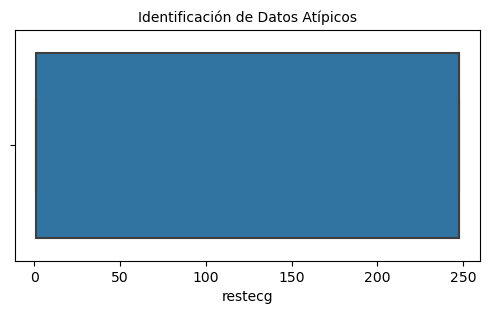

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['restecg'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [17]:
nivel_minimo=1
nivel_maximo=3
Total_Atipicos=((Archivo['restecg']<nivel_minimo)|(Archivo['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [18]:
Archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    float64
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    float64
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 32.6 KB


In [19]:
Archivo['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [20]:
Archivo[['condition']].head(50)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [21]:
X = Archivo.drop('condition',axis=1) 
Y = Archivo['condition'] 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [22]:
print (X_train)

     age  sex        cp  trestbps        chol  fbs     restecg     thalach  \
234   56    0  2.000000       200    1.000000    1    1.000000    4.000000   
82    66    0  2.000000       146  247.350168    0  247.350168  149.599327   
36    56    1  2.064857       120  247.350168    0  247.350168  149.599327   
237   56    1  2.000000       132    1.000000    0    1.000000    2.100000   
133   47    1  2.064857       108  247.350168    0  247.350168  149.599327   
..   ...  ...       ...       ...         ...  ...         ...         ...   
291   40    1  2.000000       110    1.000000    0    1.000000    2.000000   
195   61    0  2.000000       130  247.350168    0  247.350168  149.599327   
170   65    0  2.000000       150  247.350168    0  247.350168    1.000000   
135   46    0  2.000000       142    1.000000    0    1.000000    1.400000   
293   39    1  2.064857       118  247.350168    0  247.350168    1.200000   

     exang   oldpeak  slope  ca  thal  
234      1  2.000000   

In [23]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [24]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test) 

In [25]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [26]:
print (Prediccion)

[0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 1]


In [27]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.85      0.83      0.84        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



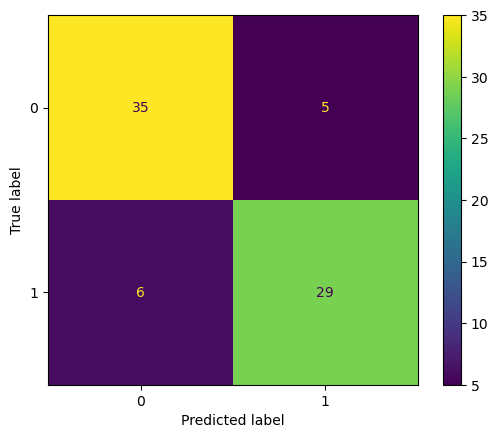

In [29]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

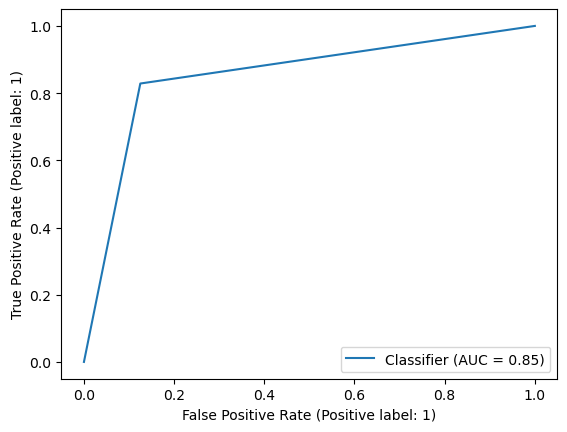

In [28]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()